In [99]:
import neo
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.signal import iirnotch, filtfilt, freqz, butter

## Loadning data

In [100]:
## Loadning of data
### 2D data
# List of filenames for each eye
filenames_2D = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D.append(data_SA)

all_data_2D = np.array(all_data_2D)
all_data_2D = np.transpose(all_data_2D, (0, 2, 1)) 
average_per_eye_2D = np.mean(all_data_2D, axis=1)


# List of filenames for each eye
filenames_2D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms_TTX006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms_TTX008.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms_TTX008.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms_TTX001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms_TTX003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms_TTX006.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D_TTX = []
average_per_eye_2D_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D_TTX.append(data_SA[:300300])

all_data_2D_TTX = np.array(all_data_2D_TTX)
all_data_2D_TTX = np.transpose(all_data_2D_TTX, (0, 2, 1)) 
average_per_eye_2D_TTX = np.mean(all_data_2D_TTX, axis=1)

# List of filenames for each eye
filenames_2D_no_stim = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/NO_STIM_NO_GEN004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/NO_STIM_NO_GEN004.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D_no_stim = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D_no_stim:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D_no_stim.append(data_SA)

all_data_2D_no_stim = np.array(all_data_2D_no_stim)
all_data_2D_no_stim = np.transpose(all_data_2D_no_stim, (0, 2, 1)) 
average_per_eye_2D_no_stim = np.mean(all_data_2D_no_stim, axis=1)


### 3D data
# List of filenames for each eye
filenames_3D = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D.append(data_SA)

all_data_3D = np.array(all_data_3D)
all_data_3D = np.transpose(all_data_3D, (0, 2, 1)) 
average_per_eye_3D = np.mean(all_data_3D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D)}")
print(f"Data shape: {np.shape(average_per_eye_3D)}")

# List of filenames for each eye
filenames_3D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_TTX = []
filtered_data_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_TTX.append(data_SA)

all_data_3D_TTX = np.array(all_data_3D_TTX)
all_data_3D_TTX = np.transpose(all_data_3D_TTX, (0, 2, 1)) 
average_per_eye_3D_TTX = np.mean(all_data_3D_TTX, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D_TTX)}")
print(f"Data shape: {np.shape(average_per_eye_3D_TTX)}")

# List of filenames for each eye
filenames_3D_no_stim = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/NO_STIM_NO_GEN002.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/NO_STIM_NO_GEN016.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/NO_STIM_NO_GEN007.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_no_stim = []
filtered_data_no_stim = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_no_stim:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_no_stim.append(data_SA)

all_data_3D_no_stim = np.array(all_data_3D_no_stim)
all_data_3D_no_stim = np.transpose(all_data_3D_no_stim, (0, 2, 1)) 
average_per_eye_3D_no_stim = np.mean(all_data_3D_no_stim, axis=1)



Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms_TTX006.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms_TTX008.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms_TTX008.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all dat

## Notch filter 50 hz and 500 hz

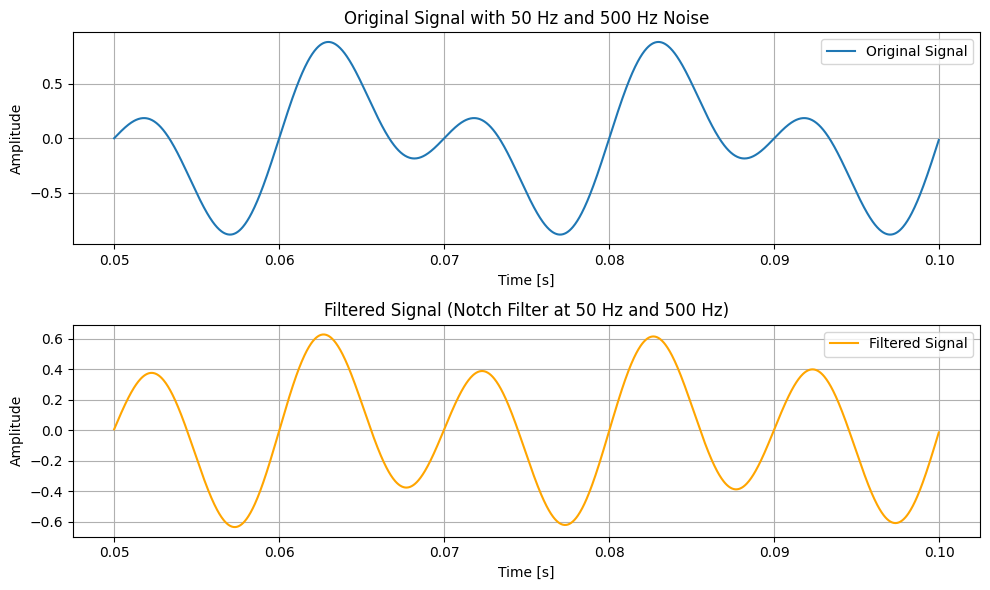

In [219]:
# Sample parameters
fs = 30000  # Sampling frequency in Hz
f_notches = [50]  # Frequencies to remove (notch frequencies)
Q = 30  # Quality factor

# Create a sample signal with noise
signal_length = 300300  # Length of the signal
t = np.linspace(0, signal_length/fs, signal_length, endpoint=False)  
# signal = all_data_2D[3][0]
signal = 0.5 * np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 100 * t)

# Design and apply notch filters for each frequency
filtered_signal = signal.copy()  # Start with the original signal
b, a = None, None  # Initialize filter coefficients

for f_notch in f_notches:
    b, a = iirnotch(f_notch, Q, fs)  # Design notch filter
    filtered_signal = filtfilt(b, a, filtered_signal)  # Apply filter

# Plot the original and filtered signals
start, end = 1500, 3000  # Define the range to plot
plt.figure(figsize=(10, 6))

# Original Signal
plt.subplot(2, 1, 1)
plt.plot(t[start:end], signal[start:end], label='Original Signal')
plt.title('Original Signal with 50 Hz and 500 Hz Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Filtered Signal
plt.subplot(2, 1, 2)
plt.plot(t[start:end], filtered_signal[start:end], label='Filtered Signal', color='orange')
plt.title('Filtered Signal (Notch Filter at 50 Hz and 500 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



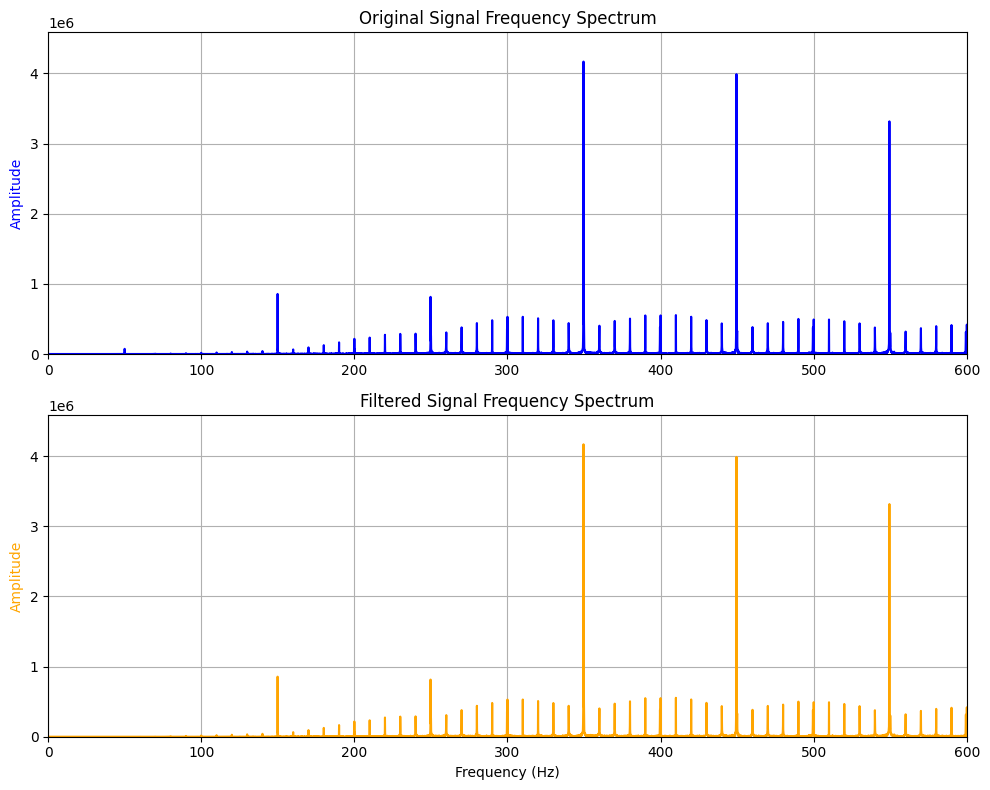

In [216]:
# Compute FFT of the original and filtered signals
fft_original = np.fft.fft(signal)
fft_filtered = np.fft.fft(filtered_signal)

# Frequency axis for plotting
freqs = np.fft.fftfreq(signal_length, 1/fs)

# Plot the frequency domain representations
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot original signal FFT
ax[0].plot(freqs[:signal_length // 2], np.abs(fft_original[:signal_length // 2]), color='blue')
ax[0].set_title("Original Signal Frequency Spectrum")
ax[0].set_ylabel("Amplitude", color='blue')
ax[0].set_xlim([0, 600])  # Focus on the range where 50 Hz and 500 Hz are located
ax[0].set_ylim([0, np.max(np.abs(fft_original[:signal_length // 2])) * 1.1])  # Adjust y-limits for visibility
ax[0].grid(True)

# Plot filtered signal FFT
ax[1].plot(freqs[:signal_length // 2], np.abs(fft_filtered[:signal_length // 2]), color='orange')
ax[1].set_title("Filtered Signal Frequency Spectrum")
ax[1].set_ylabel("Amplitude", color='orange')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 600])  # Focus on the range where 50 Hz and 500 Hz are located
ax[1].set_ylim([0, np.max(np.abs(fft_filtered[:signal_length // 2])) * 1.1])  # Adjust y-limits for visibility
ax[1].grid(True)

plt.tight_layout()
plt.show()


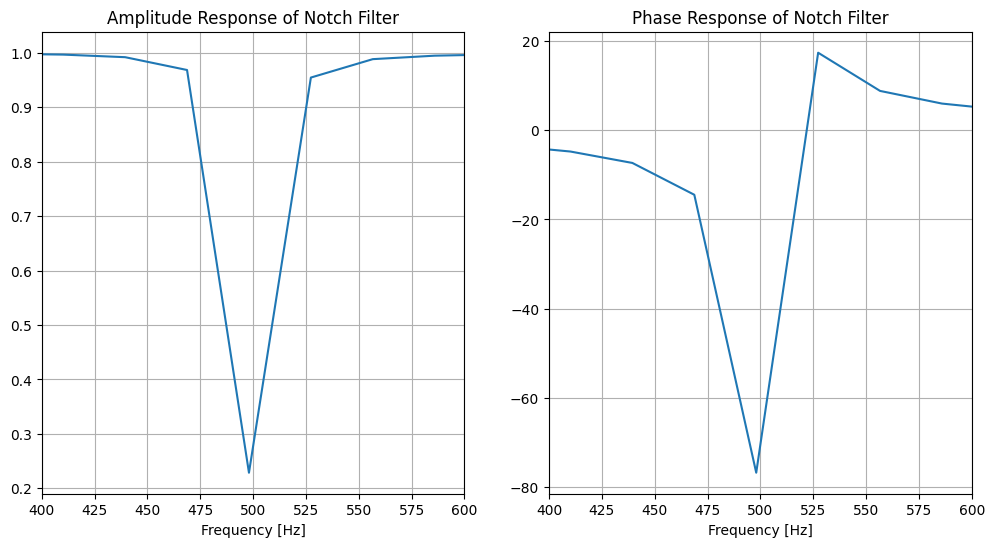

In [207]:
# Filter response (Amplitude and Phase)
filt_freq, h = freqz(b, a, fs=fs)

# Filter response plot (Amplitude and Phase)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Amplitude response
ax[0].plot(filt_freq, np.abs(h), label="Amplitude Response")
ax[0].set_title('Amplitude Response of Notch Filter')
ax[0].set_xlim([400, 600])
ax[0].set_xlabel('Frequency [Hz]')
ax[0].grid()

# Phase response
ax[1].plot(filt_freq, np.unwrap(np.angle(h)) * 180 / np.pi, label="Phase Response")
ax[1].set_title('Phase Response of Notch Filter')
ax[1].set_xlim([400, 600])
ax[1].set_xlabel('Frequency [Hz]')
ax[1].grid()

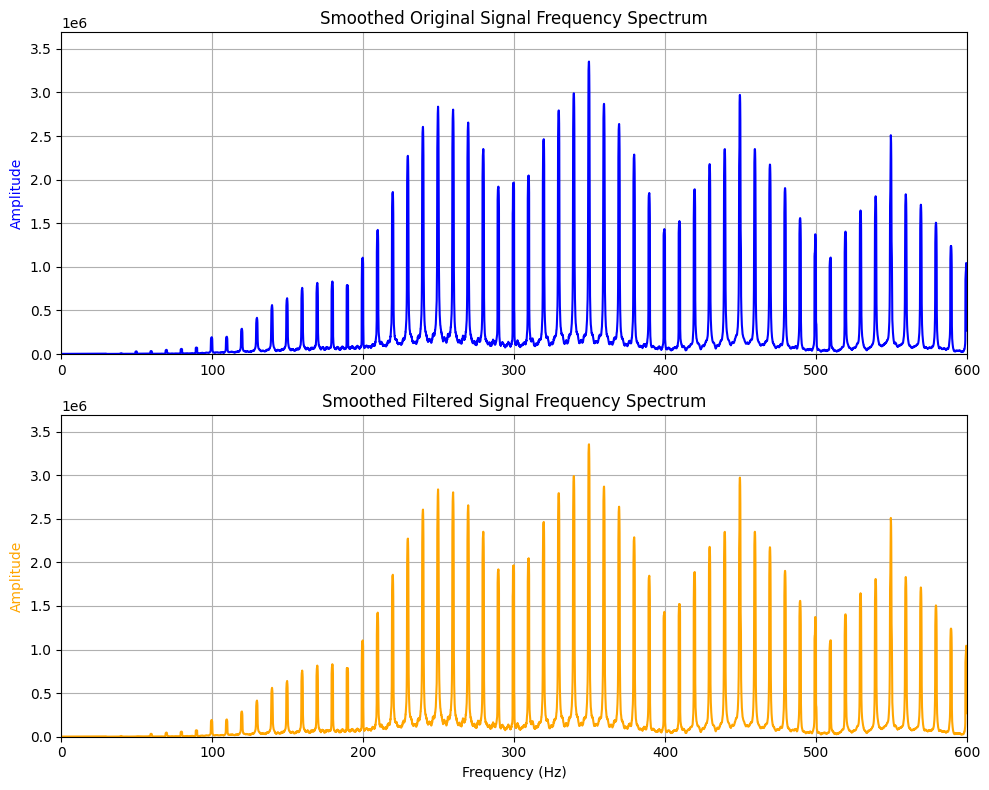

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# Function to smooth the FFT by averaging bins
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Parameters
bin_size = 10  # Increase this for larger bin size

# Compute FFT
fft_original = np.fft.fft(signal)
fft_filtered = np.fft.fft(filtered_signal)

# Frequency axis for plotting
freqs = np.fft.fftfreq(signal_length, 1/fs)

# Smooth FFT by averaging over bins
smoothed_fft_original = moving_average(np.abs(fft_original), bin_size)
smoothed_fft_filtered = moving_average(np.abs(fft_filtered), bin_size)

# Adjust frequency axis for the reduced number of points after smoothing
smoothed_freqs = freqs[:len(smoothed_fft_original)]

# Plot the frequency domain representations
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot original signal FFT
ax[0].plot(smoothed_freqs[:signal_length // 2], smoothed_fft_original[:signal_length // 2], color='blue')
ax[0].set_title("Smoothed Original Signal Frequency Spectrum")
ax[0].set_ylabel("Amplitude", color='blue')
ax[0].set_xlim([0, 600])
ax[0].set_ylim([0, np.max(smoothed_fft_original[:signal_length // 2]) * 1.1])
ax[0].grid(True)

# Plot filtered signal FFT
ax[1].plot(smoothed_freqs[:signal_length // 2], smoothed_fft_filtered[:signal_length // 2], color='orange')
ax[1].set_title("Smoothed Filtered Signal Frequency Spectrum")
ax[1].set_ylabel("Amplitude", color='orange')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 600])
ax[1].set_ylim([0, np.max(smoothed_fft_filtered[:signal_length // 2]) * 1.1])
ax[1].grid(True)

plt.tight_layout()
plt.show()


## Bandpass filter at 50hz and 500hz

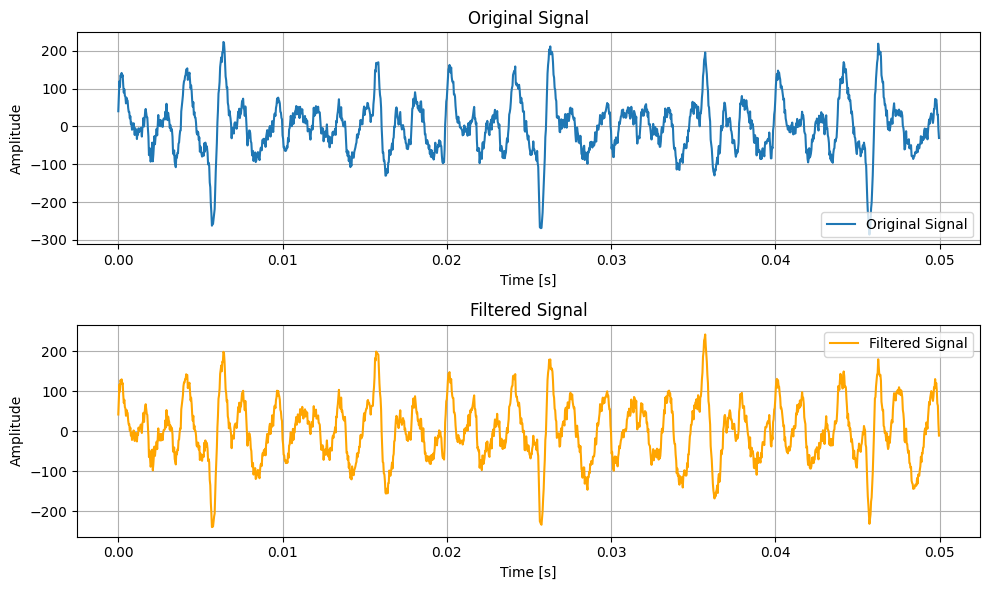

In [118]:
# Sample parameters
fs = 30000  # Sampling frequency in Hz
lowcut = 495 # Low cutoff frequency for the band-pass filter
highcut = 505  # High cutoff frequency for the band-pass filter
order = 2  # Filter order

# Create a sample signal (replace this with your actual signal)
signal_length = 300300  # Length of the signal
t = np.linspace(0, signal_length/fs, signal_length, endpoint=False)  # Time array matching the signal length
signal = all_data_3D_TTX[0][0]  # Your actual signal

# Design a band-pass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyq  # Normalize frequency
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')  # Butterworth bandpass filter
    return b, a

# Apply the filter to the signal
b, a = butter_bandpass(lowcut, highcut, fs, order=order)  # Get filter coefficients
filtered_signal = filtfilt(b, a, signal)  # Apply filter to the original signal

# Plot the original and filtered signals
start, end = 0, 1500  # Define the range to plot
plt.figure(figsize=(10, 6))

# Original Signal
plt.subplot(2, 1, 1)
plt.plot(t[start:end], signal[start:end], label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Filtered Signal
plt.subplot(2, 1, 2)
plt.plot(t[start:end], filtered_signal[start:end], label='Filtered Signal', color='orange')
plt.title('Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


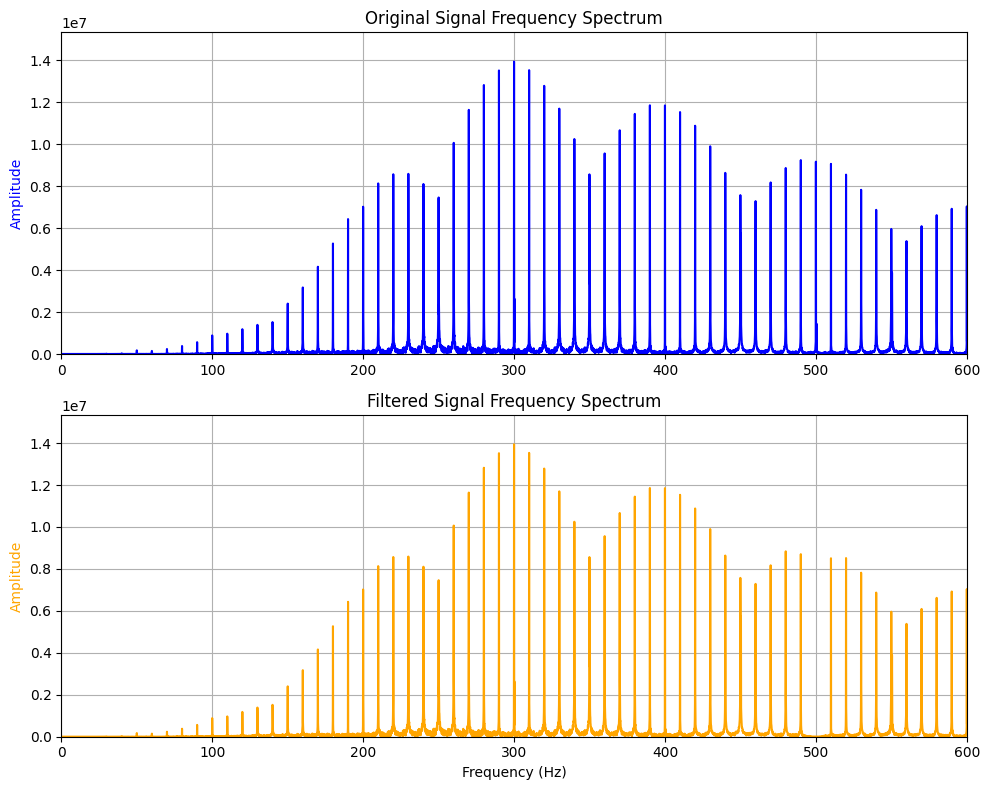

In [119]:
# Compute FFT of the original and filtered signals
fft_original = np.fft.fft(signal)
fft_filtered = np.fft.fft(filtered_signal)

# Frequency axis for plotting
freqs = np.fft.fftfreq(signal_length, 1/fs)

# Plot the frequency domain representations
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot original signal FFT
ax[0].plot(freqs[:signal_length // 2], np.abs(fft_original[:signal_length // 2]), color='blue')
ax[0].set_title("Original Signal Frequency Spectrum")
ax[0].set_ylabel("Amplitude", color='blue')
ax[0].set_xlim([0, 600])  # Focus on the range where 50 Hz and 500 Hz are located
ax[0].set_ylim([0, np.max(np.abs(fft_original[:signal_length // 2])) * 1.1])  # Adjust y-limits for visibility
ax[0].grid(True)

# Plot filtered signal FFT
ax[1].plot(freqs[:signal_length // 2], np.abs(fft_filtered[:signal_length // 2]), color='orange')
ax[1].set_title("Filtered Signal Frequency Spectrum")
ax[1].set_ylabel("Amplitude", color='orange')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 600])  # Focus on the range where 50 Hz and 500 Hz are located
ax[1].set_ylim([0, np.max(np.abs(fft_filtered[:signal_length // 2])) * 1.1])  # Adjust y-limits for visibility
ax[1].grid(True)

plt.tight_layout()
plt.show()


## High pass

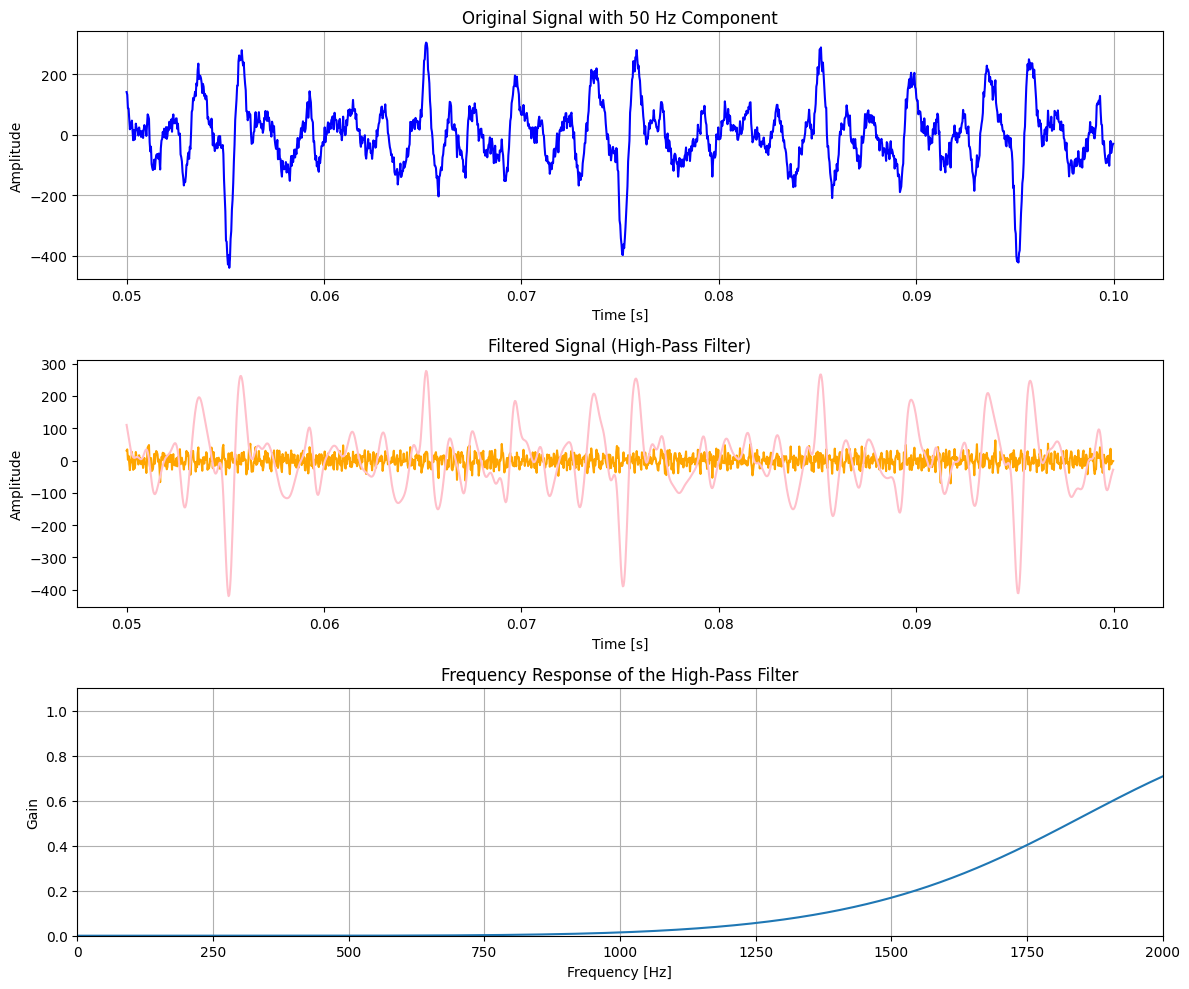

In [239]:

# Sample parameters
fs = 30000  # Sampling frequency (30 kHz)
signal_length = 300300  # Length of the signal
t = np.linspace(0, signal_length/fs, signal_length, endpoint=False)  
# Create a sample signal with a 50 Hz component and some noise
signal = all_data_3D[1][0] 

# High-pass filter design
cutoff_freq = 2000  # Cutoff frequency (60 Hz)
order = 6  # Filter order

# Butterworth high-pass filter
b, a = butter(order, cutoff_freq / (0.5 * fs), btype='high', analog=False)

# Apply the filter
filtered_signal = filtfilt(b, a, signal)

# Frequency response of the filter
w, h = freqz(b, a, worN=8000)
frequencies = w * fs / (2 * np.pi)

start, end = 1500, 3000  # Define the range to plot


# Plotting the original and filtered signals
plt.figure(figsize=(12, 10))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(t[start:end], signal[start:end], label='Original Signal', color='blue')
plt.title('Original Signal with 50 Hz Component')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

# Filtered Signal
plt.subplot(3, 1, 2)
plt.plot(t[start:end], filtered_signal[start:end], label='Filtered Signal', color='orange')
plt.title('Filtered Signal (High-Pass Filter)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

# Filtered Signal
plt.subplot(3, 1, 2)
plt.plot(t[start:end], signal[start:end]- filtered_signal[start:end], label='Difference Signal', color='pink')
plt.title('Filtered Signal (High-Pass Filter)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

# Frequency Response
plt.subplot(3, 1, 3)
plt.plot(frequencies, np.abs(h), label='High-Pass Filter Response')
plt.title('Frequency Response of the High-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.xlim([0, 2000])  # Focus on frequencies of interest
plt.ylim([0, 1.1])  # Limit y-axis for better visibility

plt.tight_layout()
plt.show()

